In [2]:
import pandas as pd
import numpy as np
from functools import reduce
import copy

In [3]:
df_train_news = pd.read_csv("news_popularity_train.csv")
df_test_news = pd.read_csv("news_popularity_test.csv")


In [4]:
is_col_numeric = []
is_col_ordinal = []
is_col_discreet = []
for elements_cols in df_train_news.columns:
    if ".int" in str(type(df_train_news.at[0, elements_cols])) or "'int'" in str(type(df_train_news.at[0, elements_cols])) or "'float'" in str(type(df_train_news.at[0, elements_cols])) or ".float" in str(type(df_train_news.at[0, elements_cols])):
        is_col_numeric.append(elements_cols)
    elif df_train_news[elements_cols].nunique() < 20:
        is_col_ordinal.append(elements_cols)
    else:
        is_col_discreet.append(elements_cols)


In [5]:
avg_value_col = []
min_value_col = []
max_value_col = []
median_value_col = []
num_examples_without_empty_values = []
l_25th_percentile_val = []
l_75th_percentile_val = []

from prettytable import PrettyTable 
from statistics import stdev



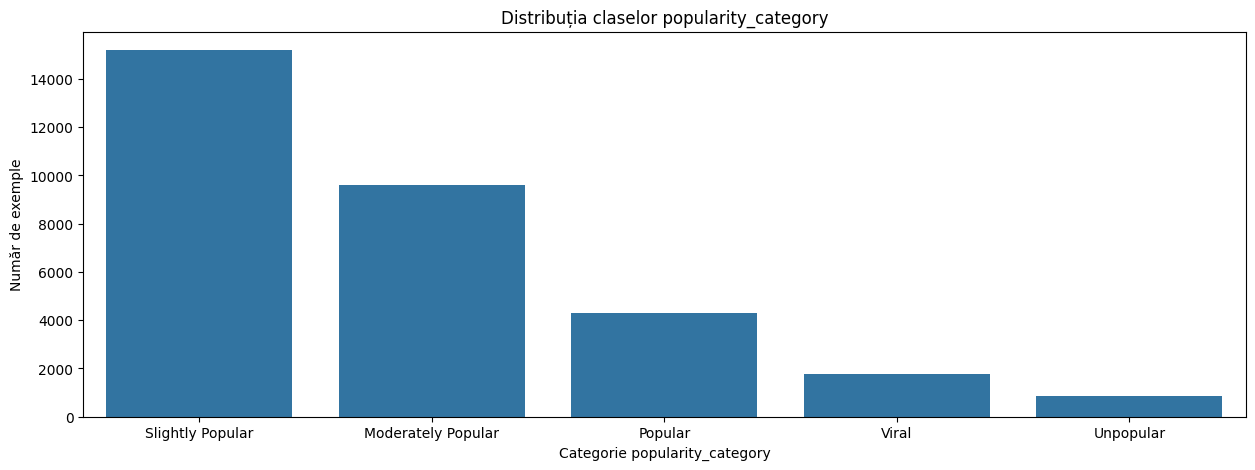

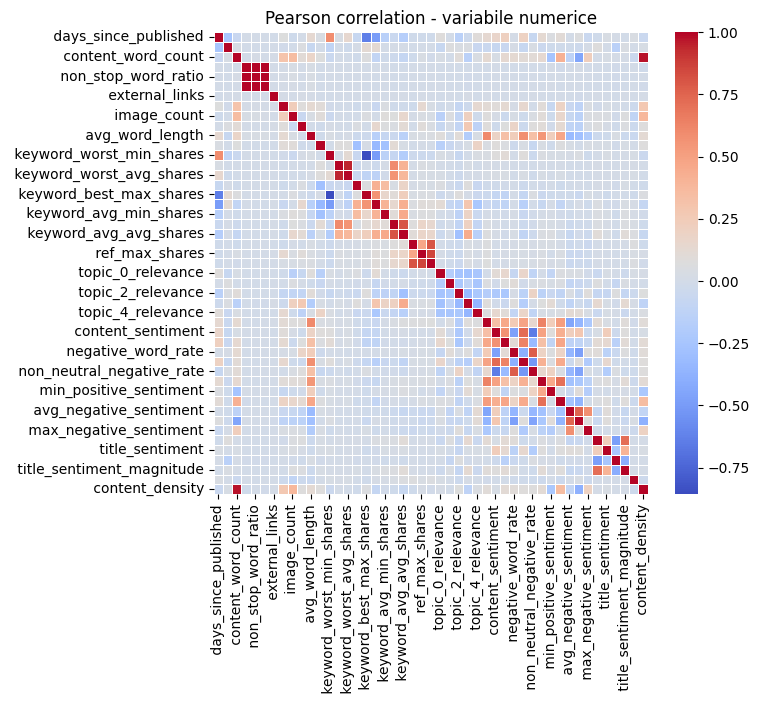

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


plt.figure(figsize=(15,5))
sns.countplot(x='popularity_category', data=df_train_news,
              order=df_train_news['popularity_category'].value_counts().index)
plt.title('Distribuția claselor popularity_category')
plt.xlabel('Categorie popularity_category')
plt.ylabel('Număr de exemple')
plt.show()



numeric_cols = is_col_numeric
corr = df_train_news[numeric_cols].corr(method='pearson')
plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Pearson correlation - variabile numerice')
plt.show()


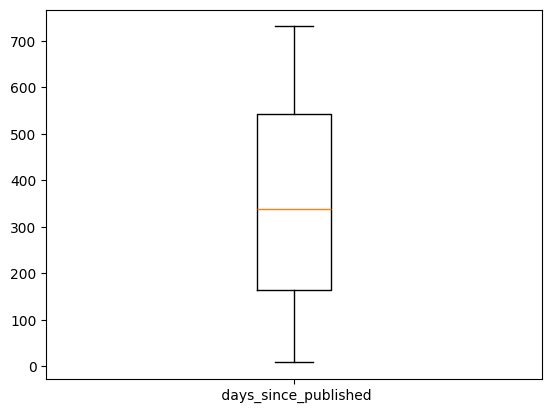

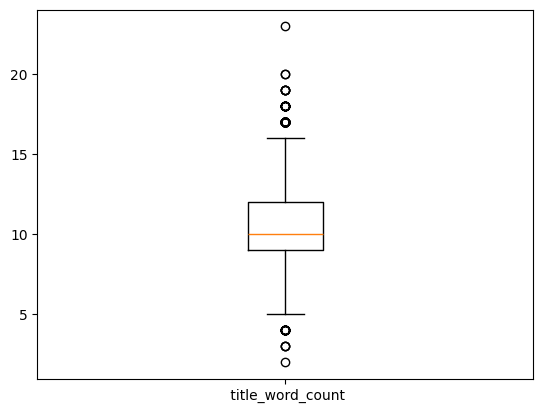

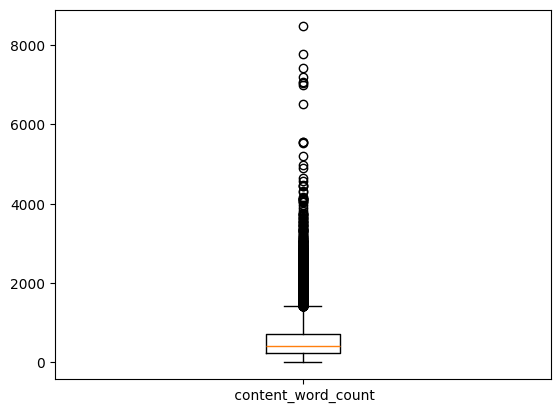

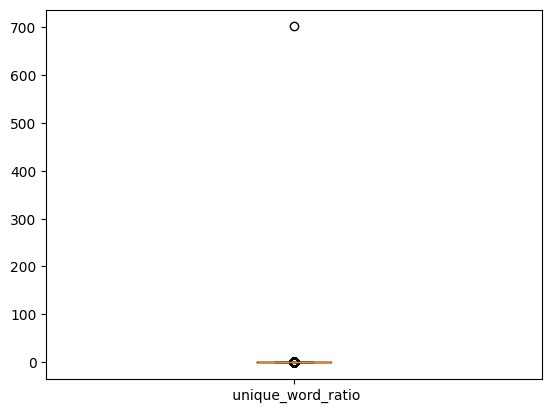

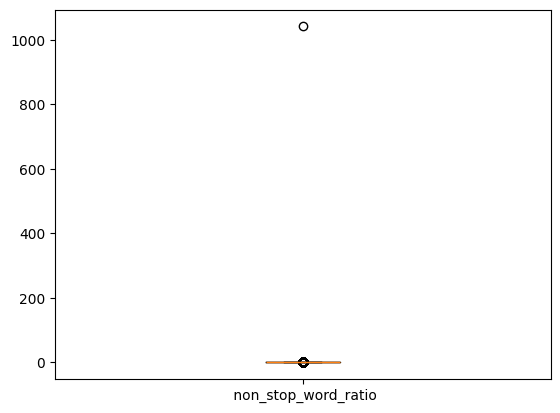

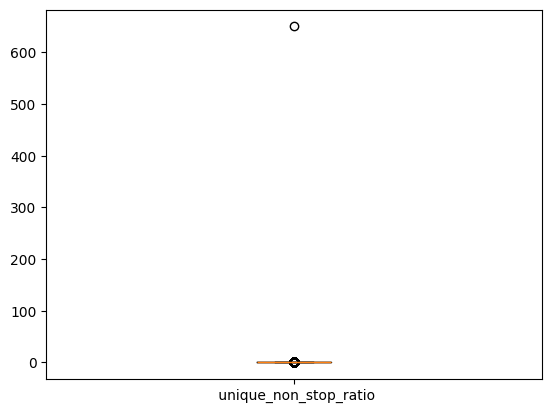

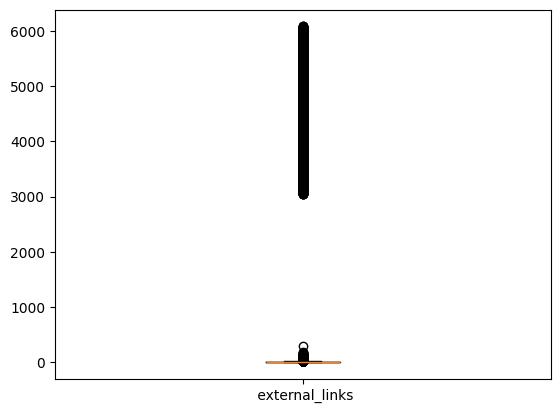

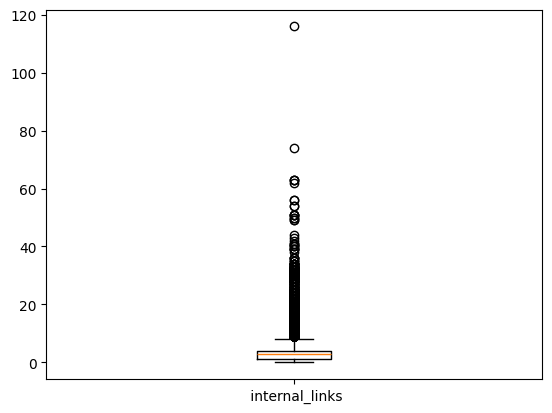

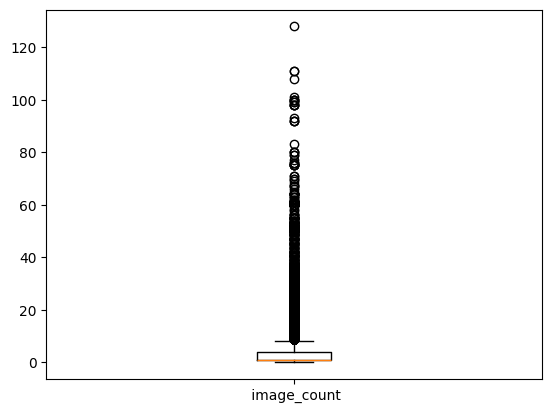

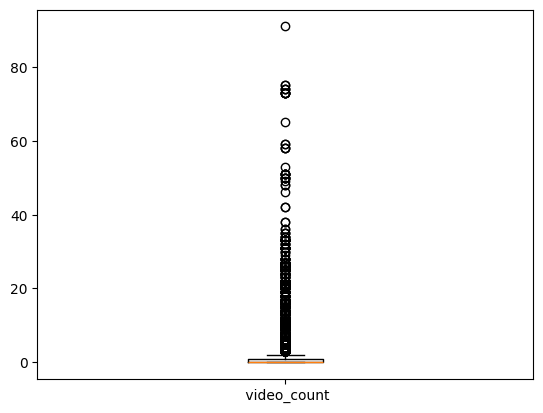

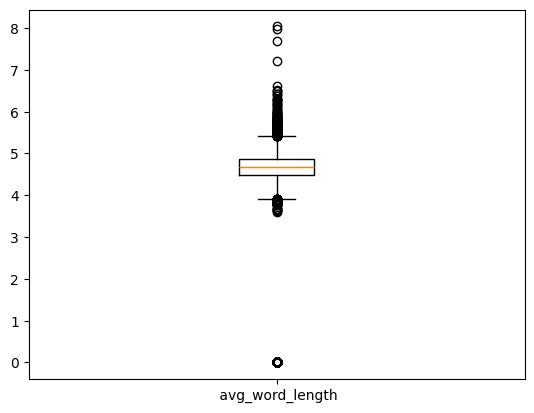

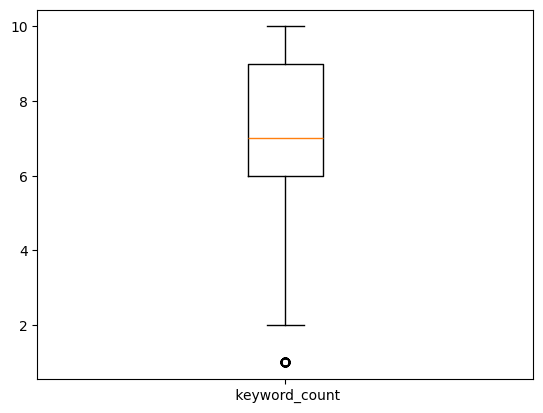

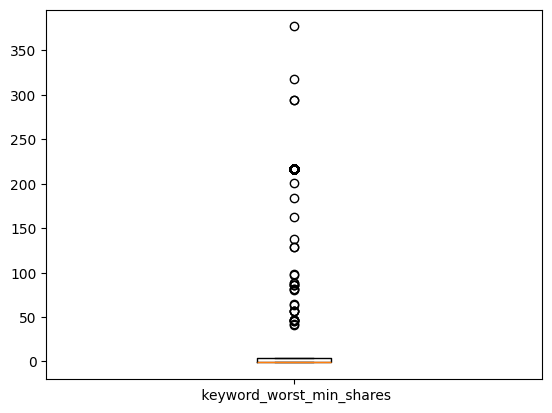

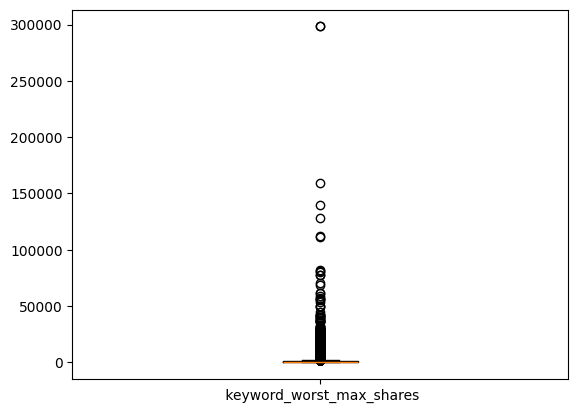

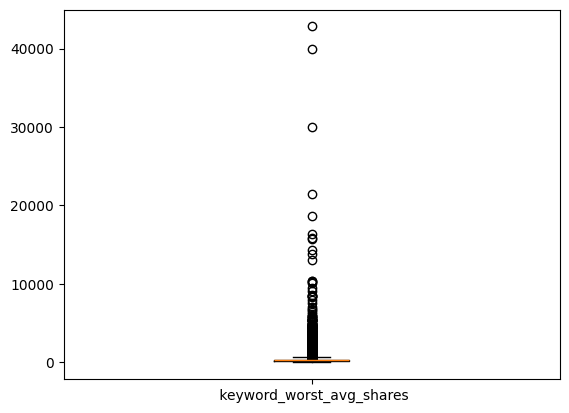

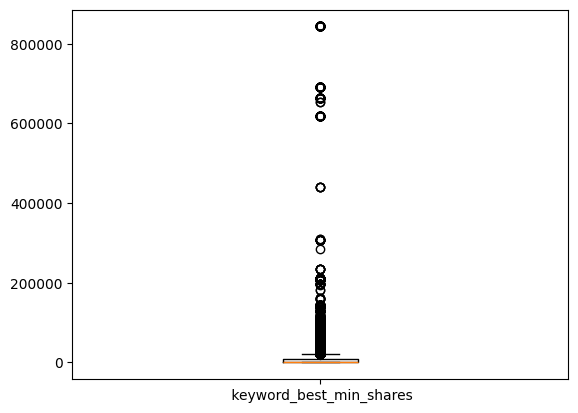

Not worth showing for column  keyword_best_max_shares


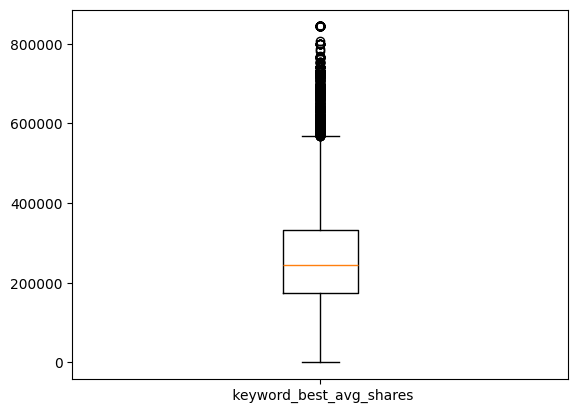

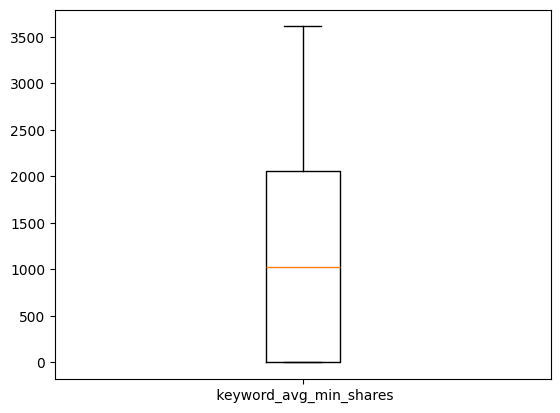

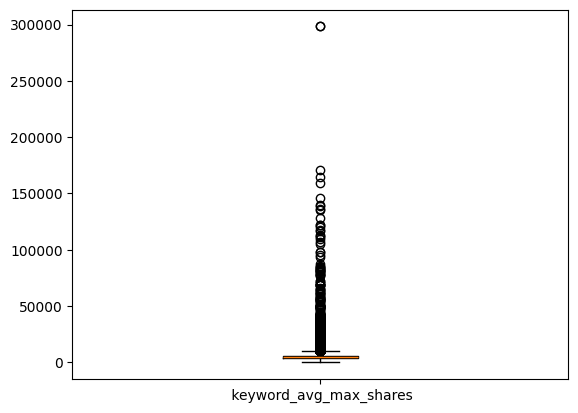

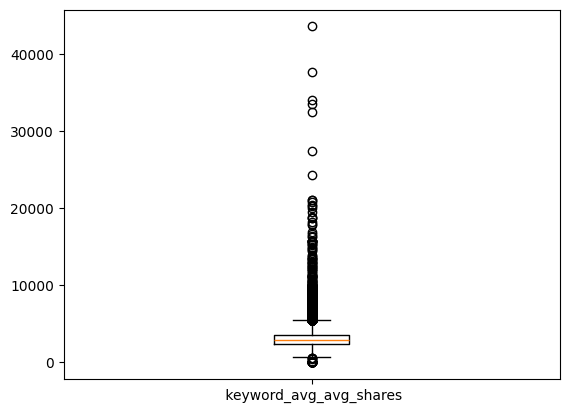

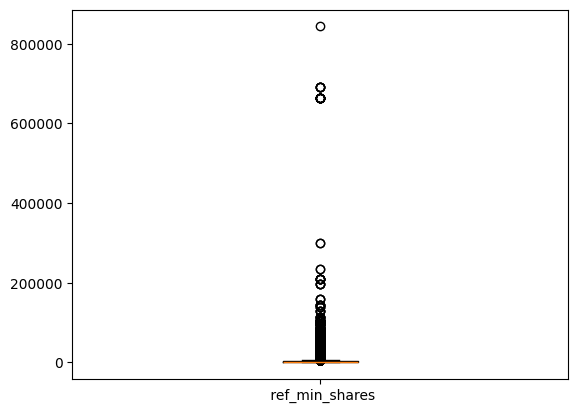

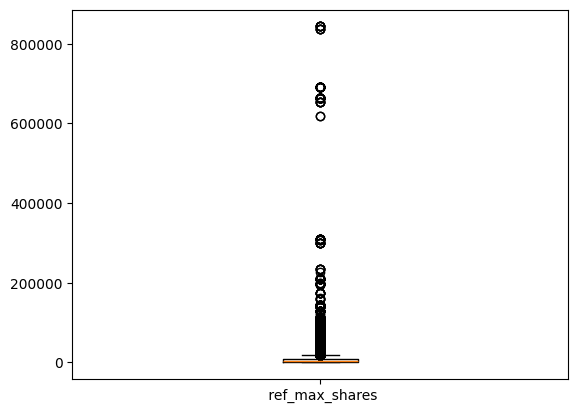

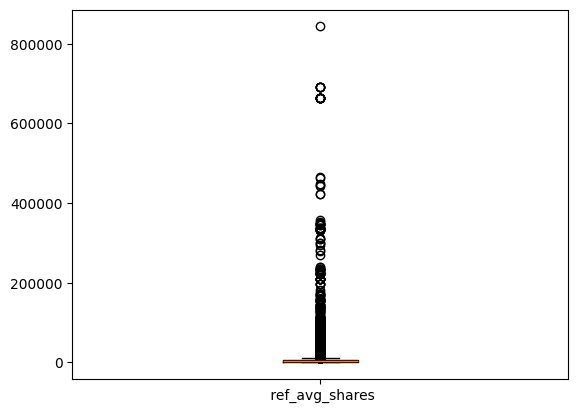

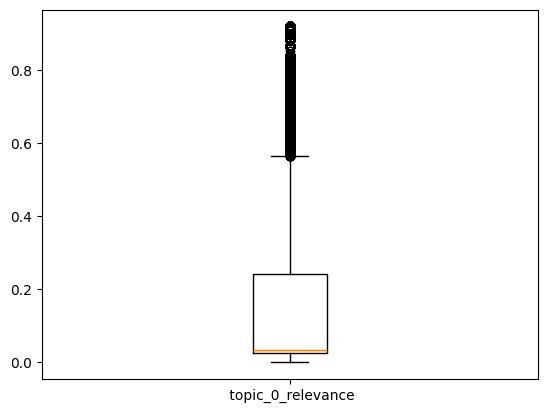

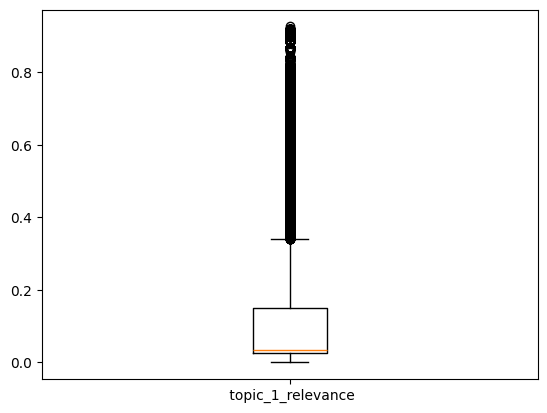

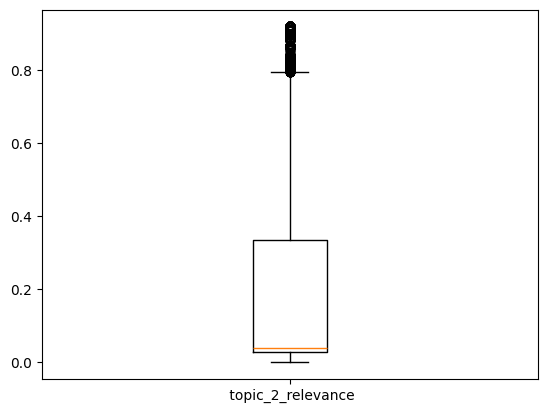

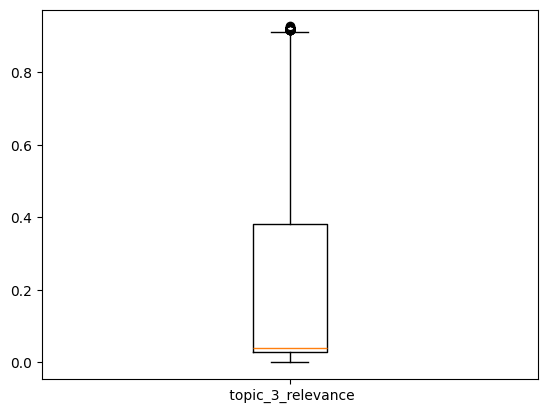

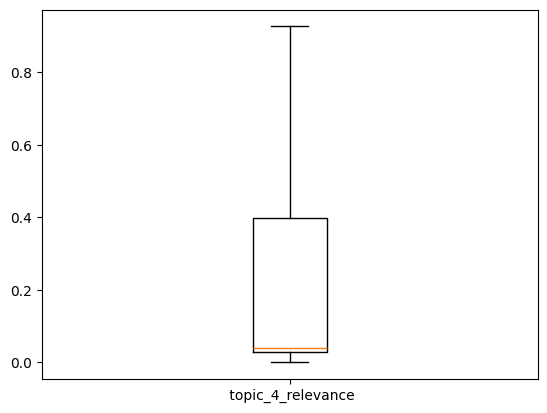

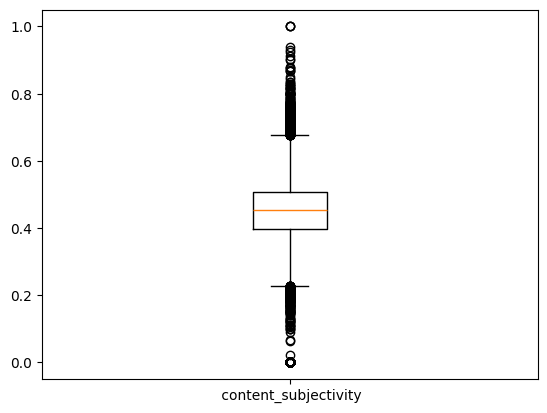

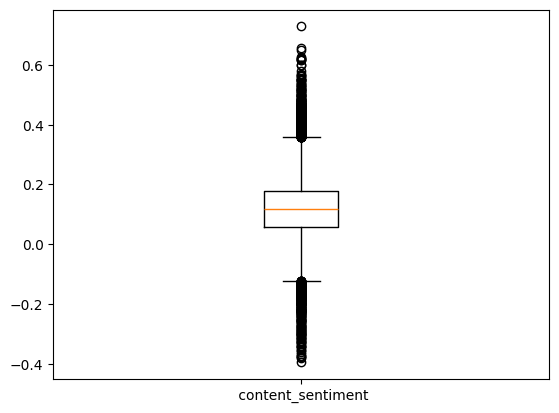

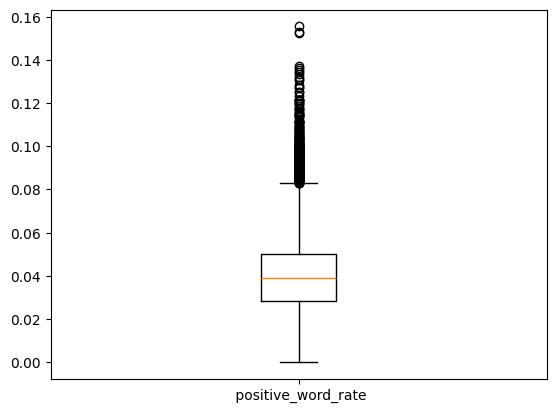

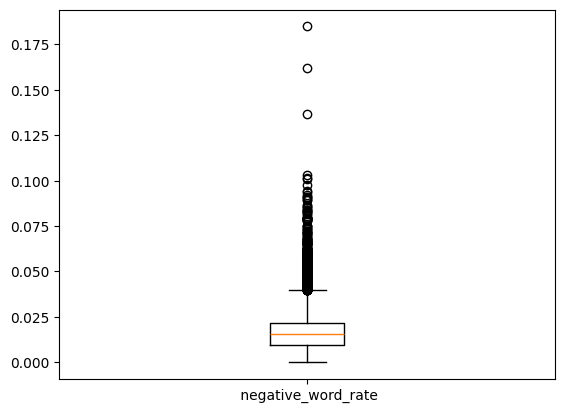

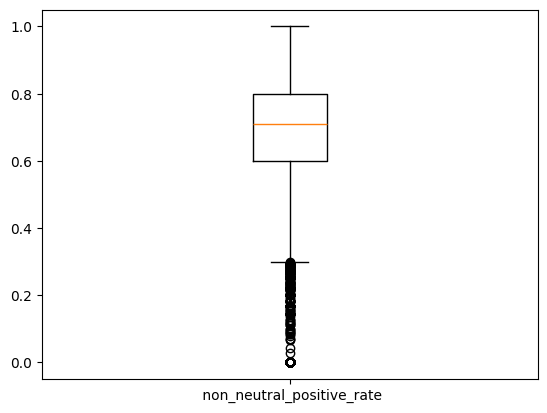

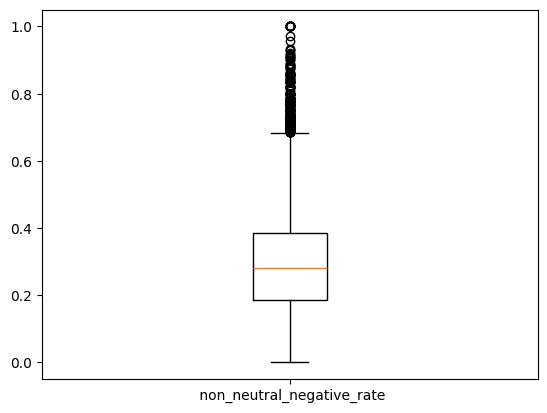

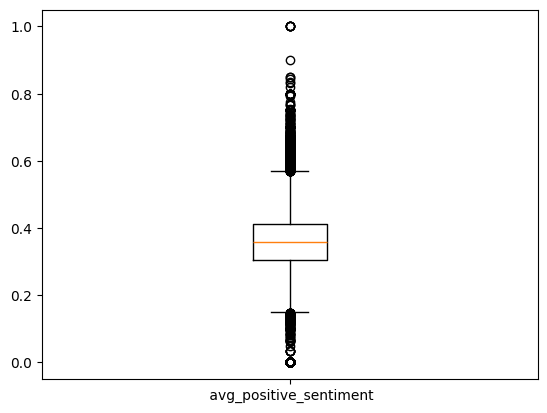

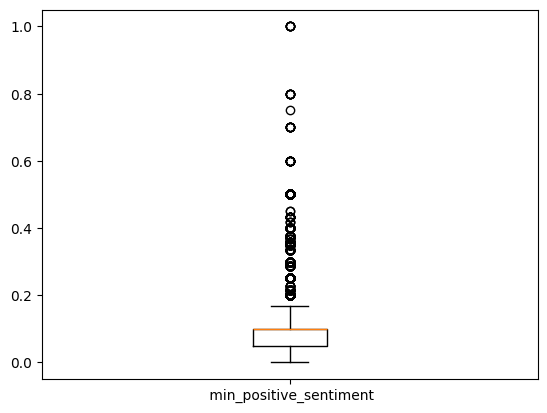

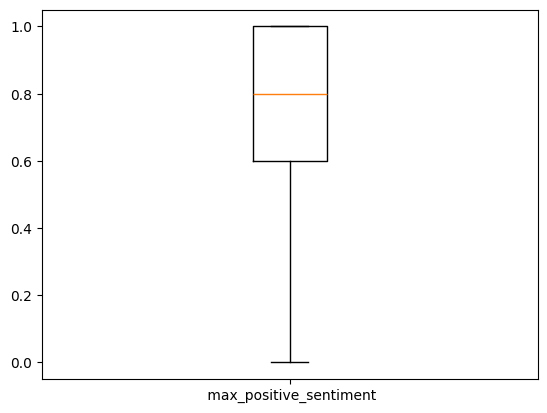

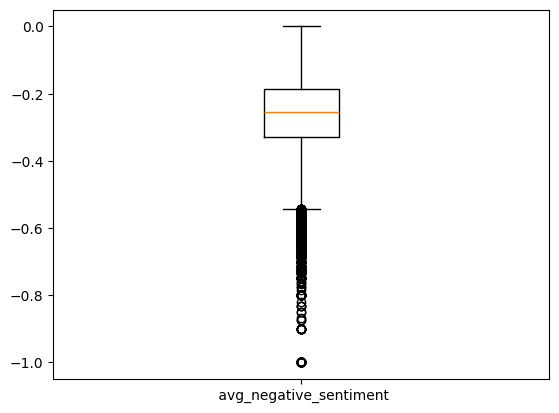

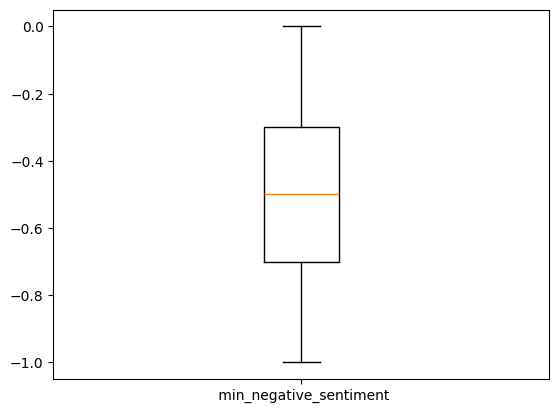

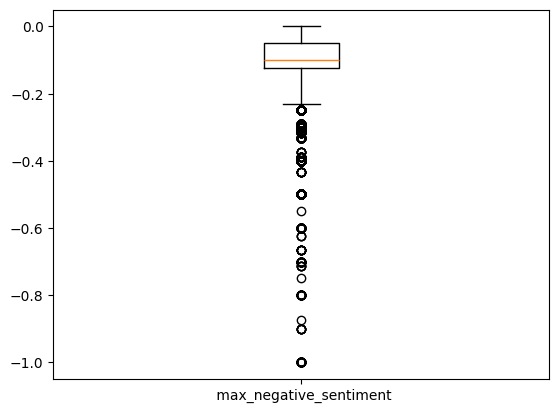

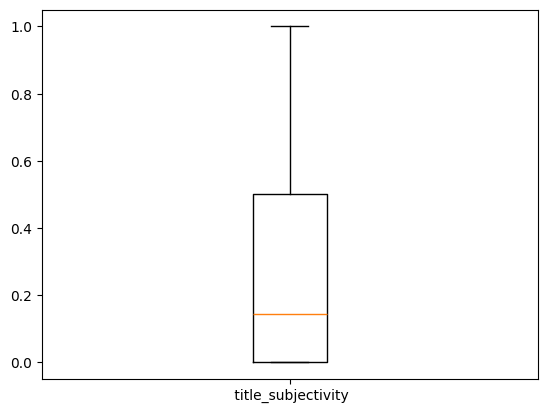

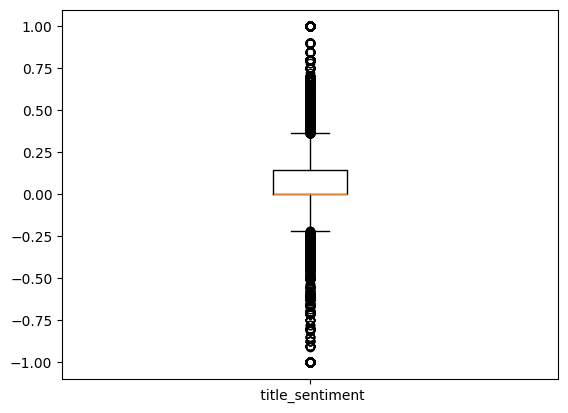

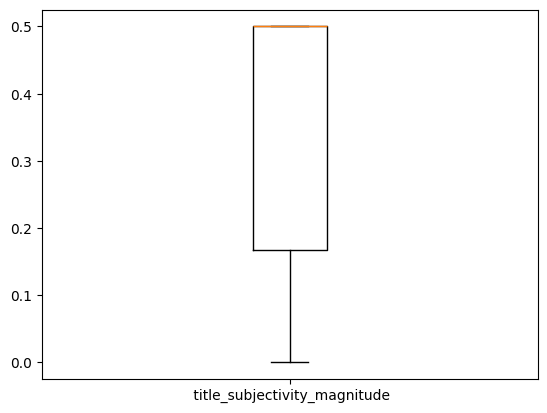

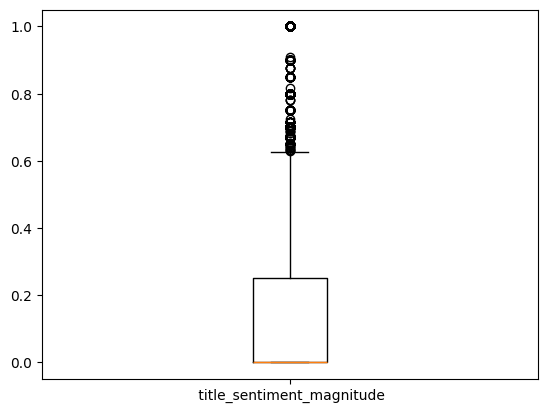

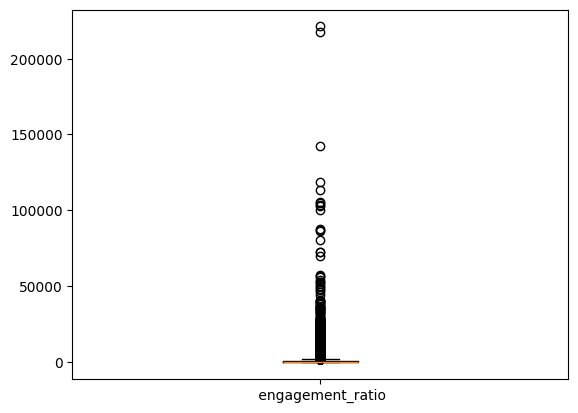

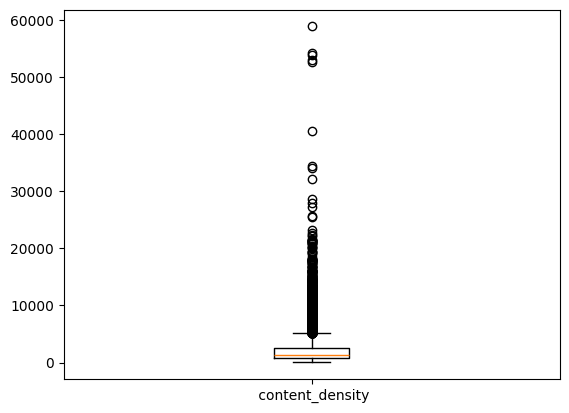

In [ ]:
import math
import matplotlib.pyplot as plt
zz=0    
table_numeric = PrettyTable(["Column", "Number of non-nan values", "Average Value", "Standard Deviation", "Minimal Value", "Lower Whisker(25%)", "Median Value", "Upper Whisker(75%)",  "Maximum Value"]) 
for colons_num in is_col_numeric:

    zz+=1
    
    elements_mean_col = df_train_news[colons_num].copy().mean(skipna=True)
    avg_value_col.append(float(elements_mean_col))

    values_list = df_train_news[colons_num].copy().dropna()
    values_list = list(values_list)

    max_value_col.append(max(values_list))
    min_value_col.append(min(values_list))

    length_el = len(values_list)


    num_examples_without_empty_values.append(length_el)
    
    values_list.sort()


    val_25_th_percentile = -math.inf
    val_75_th_percentile = -math.inf

    median_value = -math.inf

    if length_el//4 != (int)(length_el/4):
        val_25_th_percentile = values_list[length_el//4+1]
        val_75_th_percentile = values_list[(length_el*3)//4+1]
    else:
        val_25_th_percentile = values_list[length_el//4]
        val_75_th_percentile = values_list[(length_el*3)//4]

    if length_el//2 != (int)(length_el/2):
        median_value = values_list[length_el//2+1]
    else:
        median_value = values_list[length_el//2]
    
    l_75th_percentile_val.append(val_75_th_percentile)
    l_25th_percentile_val.append(val_25_th_percentile)
    median_value_col.append(median_value)

    table_numeric.add_row([ colons_num, len(values_list), elements_mean_col, stdev(values_list), min(values_list), val_25_th_percentile, median_value, val_75_th_percentile, max(values_list)]) 




    if median_value == val_25_th_percentile and median_value == val_75_th_percentile:
        print(f"Not worth showing for column {colons_num}")
    else:
        plt.boxplot(df_train_news[colons_num].copy().dropna(), showfliers=True, tick_labels=[colons_num])
        plt.show()

    

In [ ]:
print(table_numeric)

+-------------------------------+--------------------------+----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+-------------------+
|             Column            | Number of non-nan values |    Average Value     |  Standard Deviation  |   Minimal Value    | Lower Whisker(25%) |    Median Value    | Upper Whisker(75%) |   Maximum Value   |
+-------------------------------+--------------------------+----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+-------------------+
|      days_since_published     |          31715           |  354.8379000472962   |  214.0043402694524   |        8.0         |       164.0        |       339.0        |       542.0        |       731.0       |
|        title_word_count       |          31715           |  10.399463976036575  |  2.1164332297953306  |        2.0         |        9.0         |        

In [ ]:
import math
import matplotlib.pyplot as plt
zz=0
table_ord_n_cat = PrettyTable(["Column", "Number of non-nan values", "Unique values"]) 
skip_column = []
for colons_num in is_col_discreet:
    dict_category = {}
    for el in df_train_news[colons_num].dropna():
        if el not in dict_category.keys():
            dict_category[el] = 1
        else:
            dict_category[el]+=1

    dict_category_filter = {key : val for key, val in dict_category.items()
                   if val > 1}
    
    table_ord_n_cat.add_row([colons_num, len(df_train_news[colons_num].dropna()), len(df_train_news[colons_num].unique())])
    if dict_category_filter == {}:
        print(f"Cannot show histogram for column: {colons_num}")
        skip_column.append(colons_num)
    else:
        dict_category_filter = {key : val for key, val in dict_category_filter.items()
                   if val > 300}
        plt.figure(figsize=(45,15))
        new_dictonary = {str(k):v for k,v in dict_category_filter.items()}

        plt.bar(new_dictonary.keys(), new_dictonary.values(), width=.5)
        plt.show()
        



Cannot show histogram for column: url


In [13]:
import math
import matplotlib.pyplot as plt
zz=0
from prettytable import PrettyTable

table_ord_n_cat = PrettyTable(["Column", "Number of non-nan values",  "Total number of values per column", "Unique values"]) 

for colons_num in list(df_train_news.columns):
    dict_ordinal = {}
    for el in df_train_news[colons_num].dropna():
        if el not in dict_ordinal.keys():
            dict_ordinal[el] = 1
        else:
            dict_ordinal[el]+=1
    
    if len(df_train_news[colons_num].dropna()) == len(df_train_news[colons_num]):
        continue
    
    table_ord_n_cat.add_row([colons_num, len(df_train_news[colons_num].dropna()), len(df_train_news[colons_num]), len(df_train_news[colons_num].unique())])




In [14]:
print(table_ord_n_cat)

+--------------------+--------------------------+-----------------------------------+---------------+
|       Column       | Number of non-nan values | Total number of values per column | Unique values |
+--------------------+--------------------------+-----------------------------------+---------------+
|  channel_lifestyle |          28540           |               31715               |       3       |
|   content_density  |          28570           |               31715               |     28571     |
+--------------------+--------------------------+-----------------------------------+---------------+


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


for colons_num in is_col_discreet:
    if colons_num in skip_column:
        continue

    top_countries = df_train_news[colons_num].value_counts().head(20) 

    top_countries_df = top_countries.reset_index()
    top_countries_df.columns = [colons_num, 'Count']

    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_countries_df, x='Count', y=colons_num, hue=colons_num, palette='viridis', legend=False)
    plt.xlabel("Number of Occurances")
    plt.ylabel(colons_num)
    plt.tight_layout()
    plt.show()

 channel_lifestyle
N    6765
Y     375
Name: count, dtype: int64


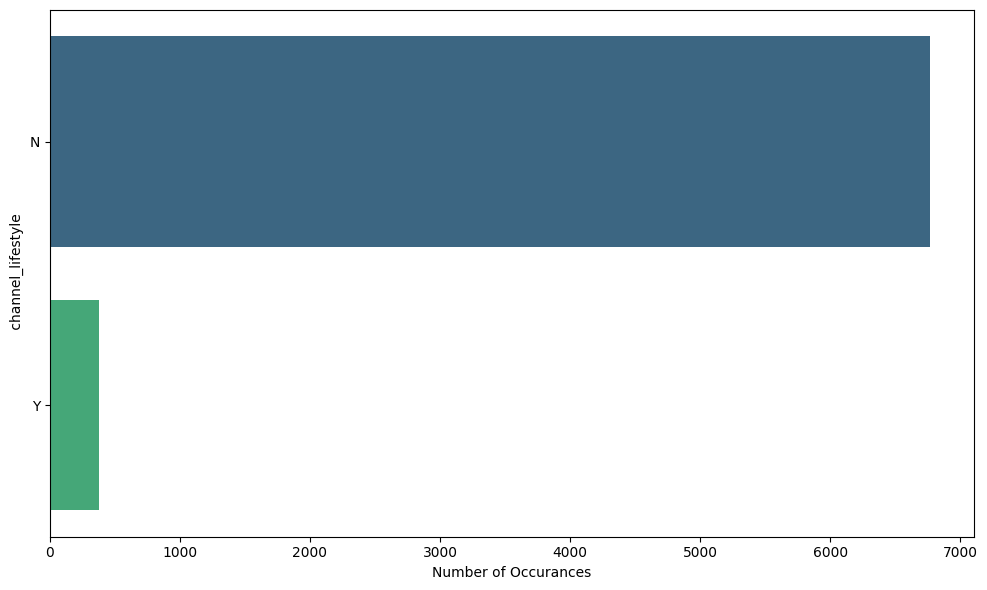

 channel_entertainment
N    6490
Y    1439
Name: count, dtype: int64


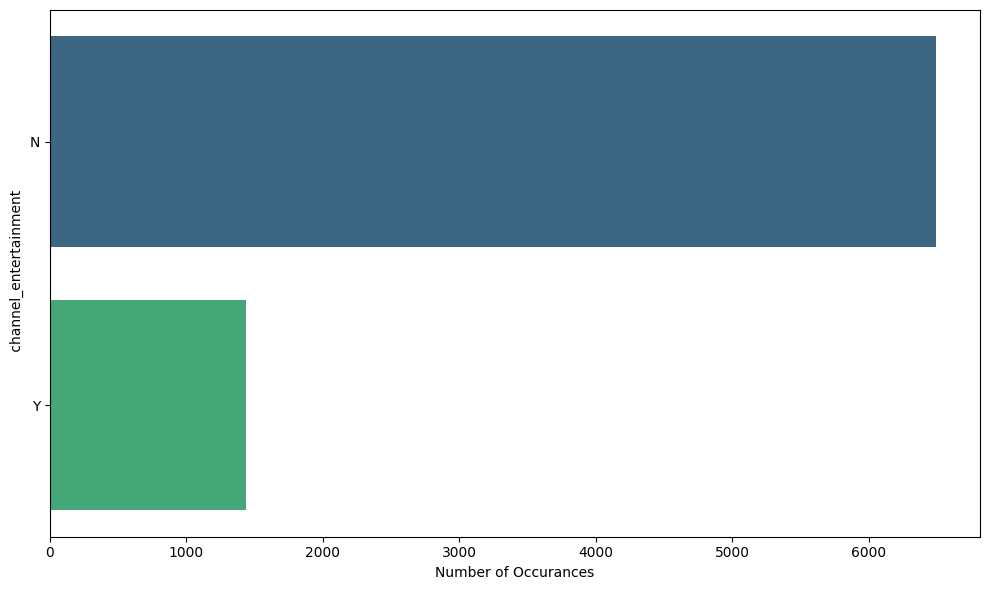

 channel_business
N    6674
Y    1255
Name: count, dtype: int64


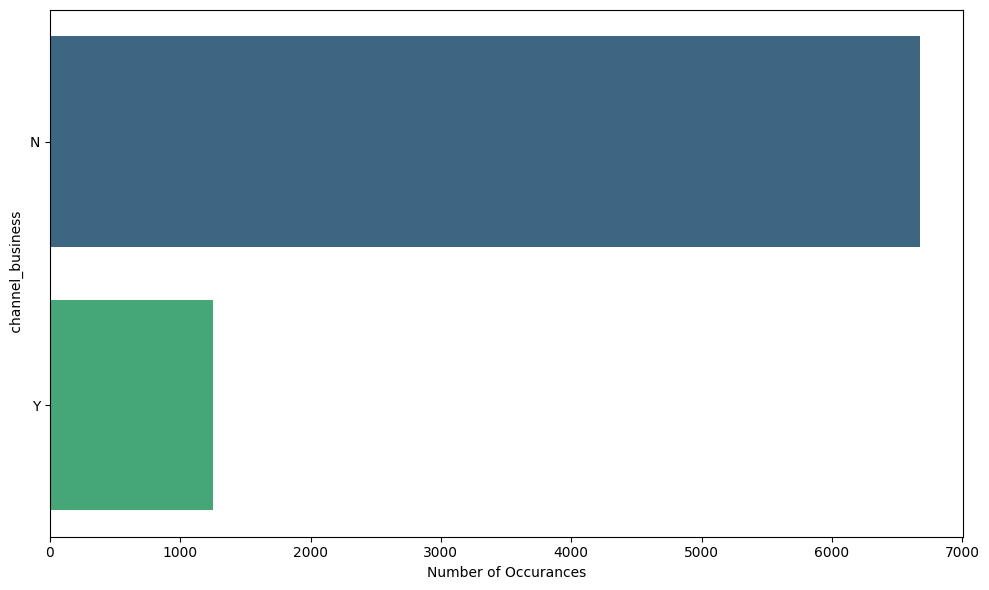

 channel_social_media
N    7477
Y     452
Name: count, dtype: int64


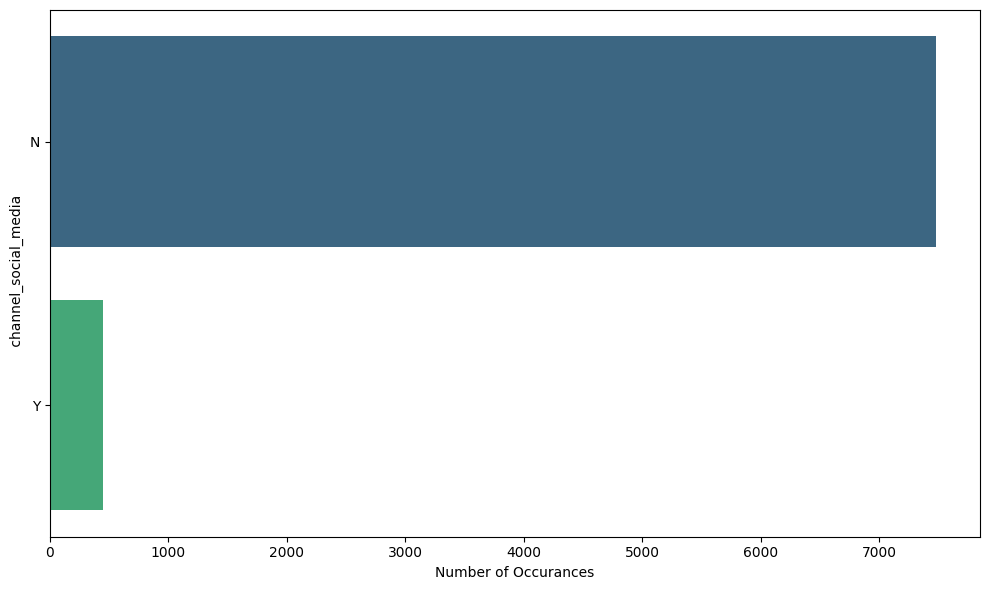

 channel_tech
N    6407
Y    1522
Name: count, dtype: int64


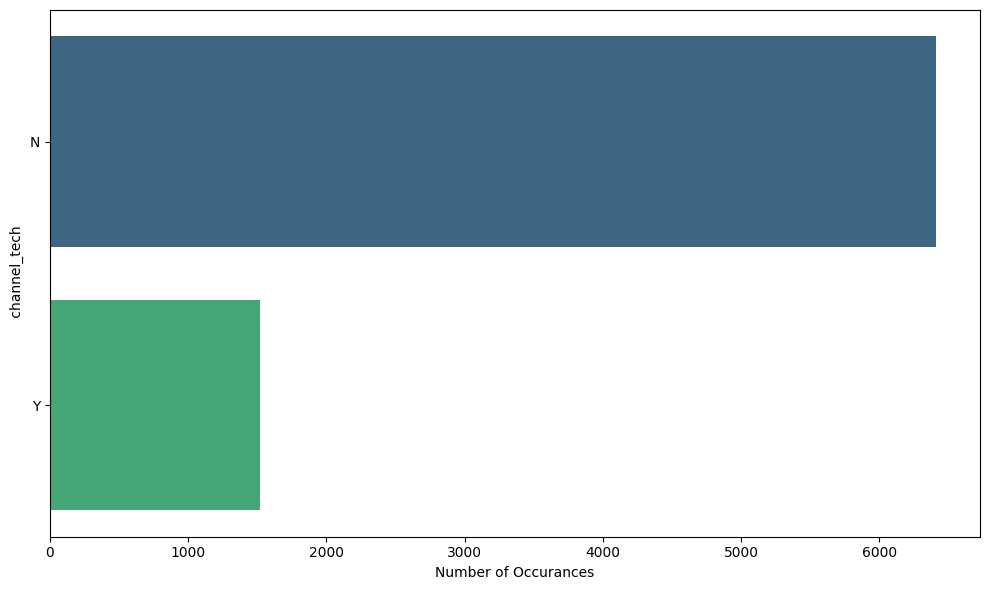

 channel_world
N    6304
Y    1625
Name: count, dtype: int64


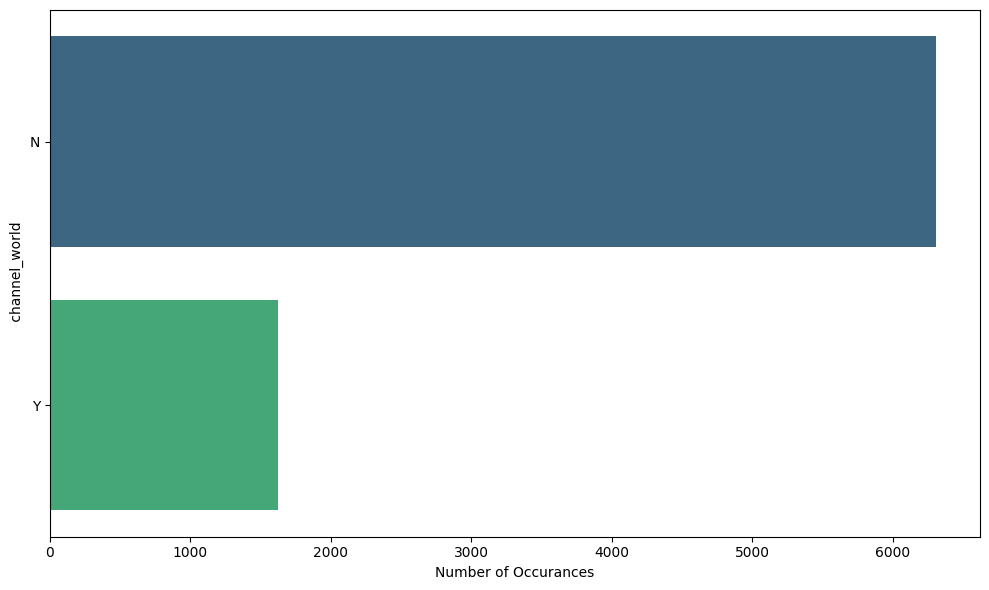

 day_monday
N    6583
Y    1346
Name: count, dtype: int64


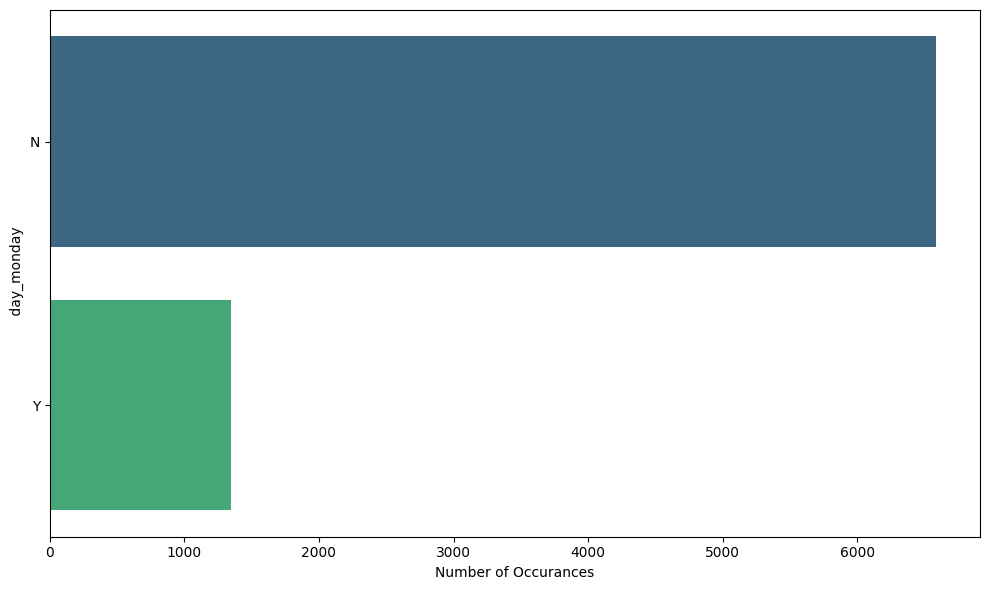

 day_tuesday
N    6394
Y    1535
Name: count, dtype: int64


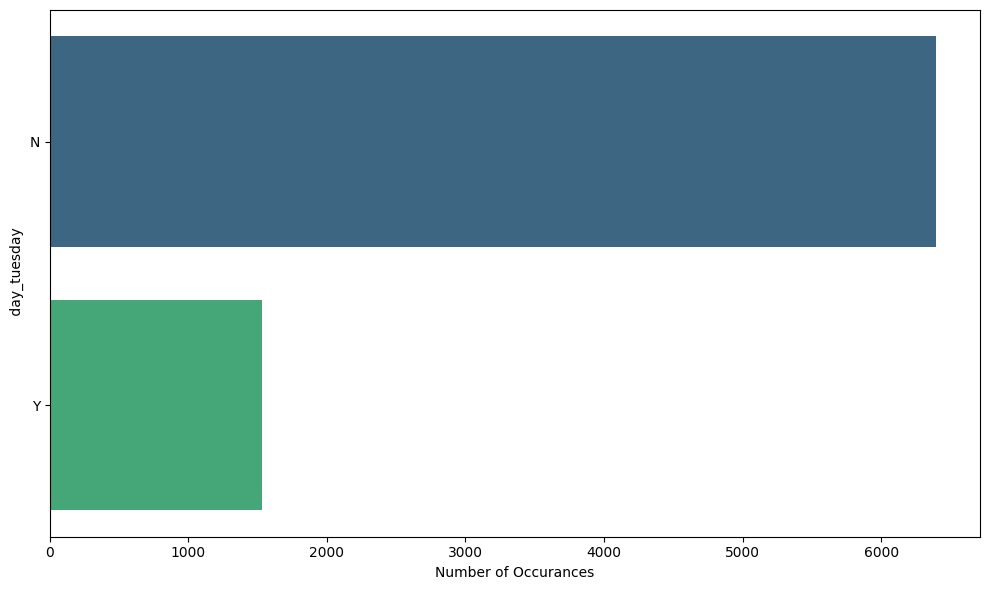

 day_wednesday
N    6476
Y    1453
Name: count, dtype: int64


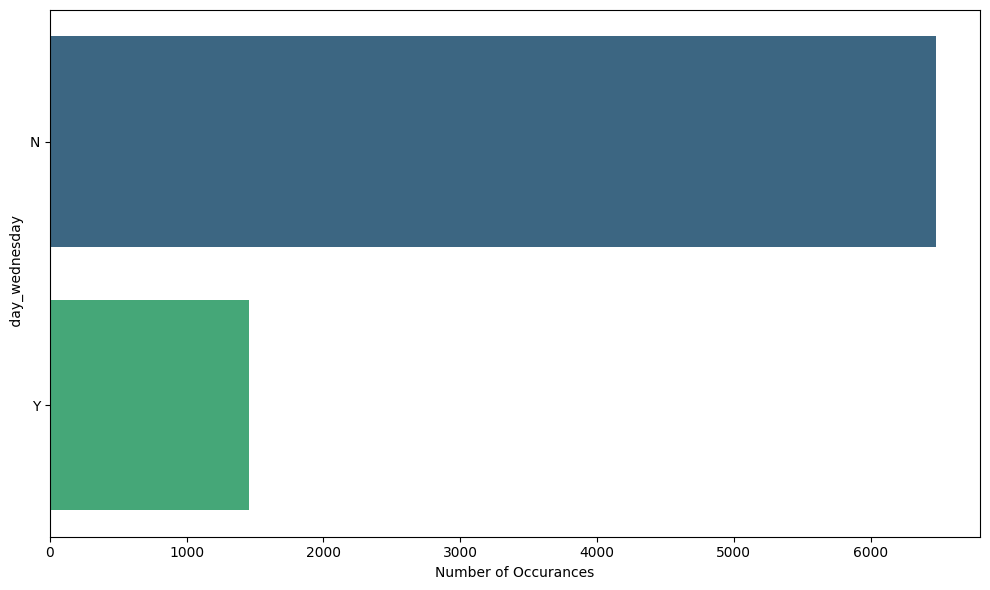

 day_thursday
N    6476
Y    1453
Name: count, dtype: int64


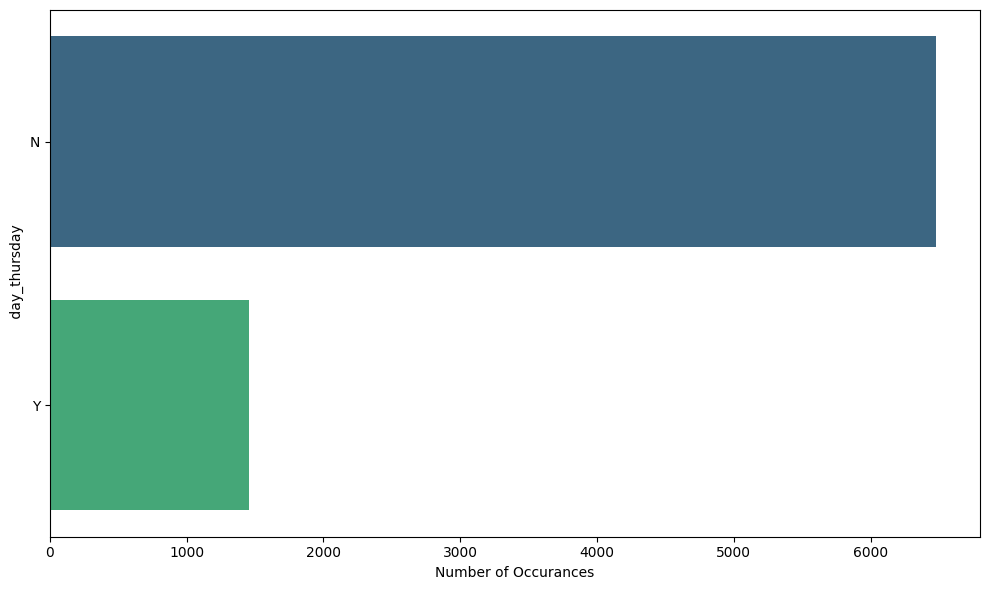

 day_friday
N    6808
Y    1121
Name: count, dtype: int64


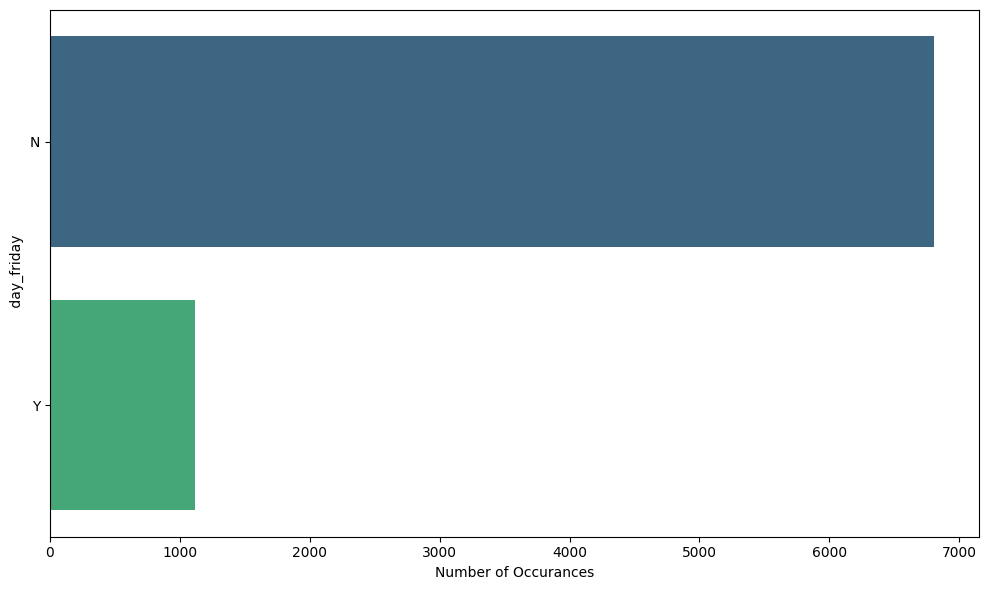

 day_saturday
N    7428
Y     501
Name: count, dtype: int64


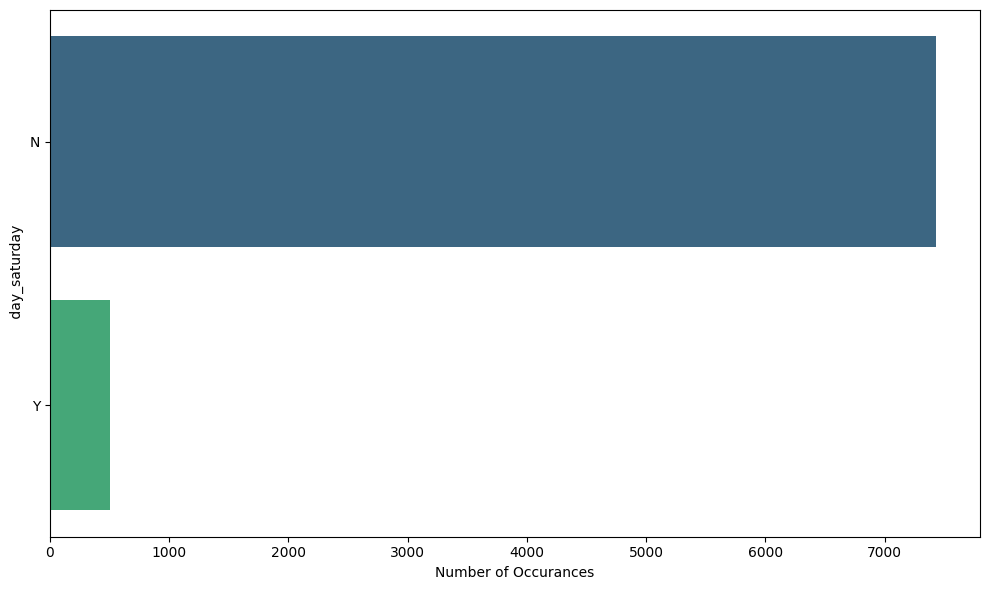

 day_sunday
N    7409
Y     520
Name: count, dtype: int64


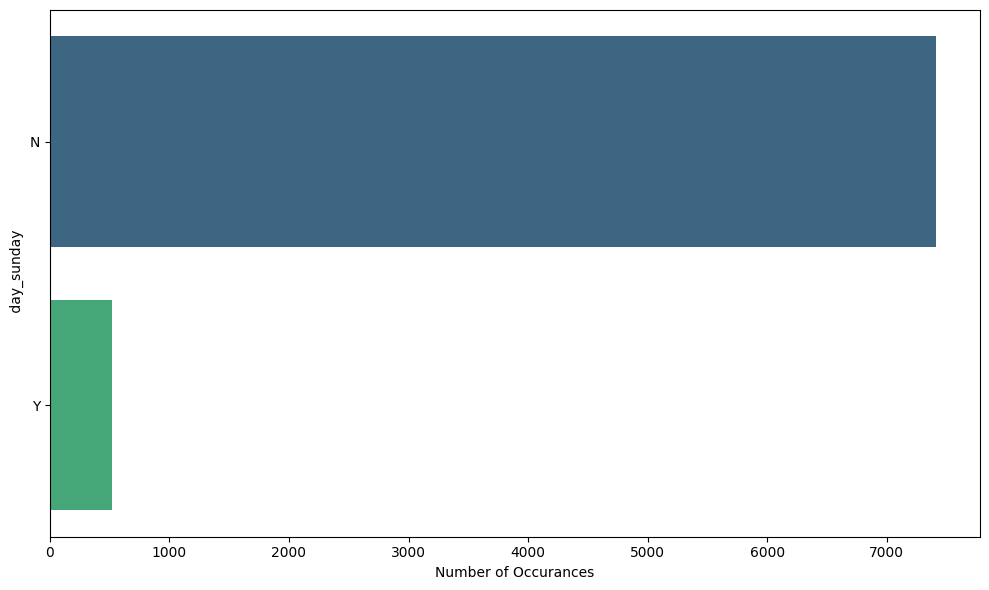

 is_weekend
N    6908
Y    1021
Name: count, dtype: int64


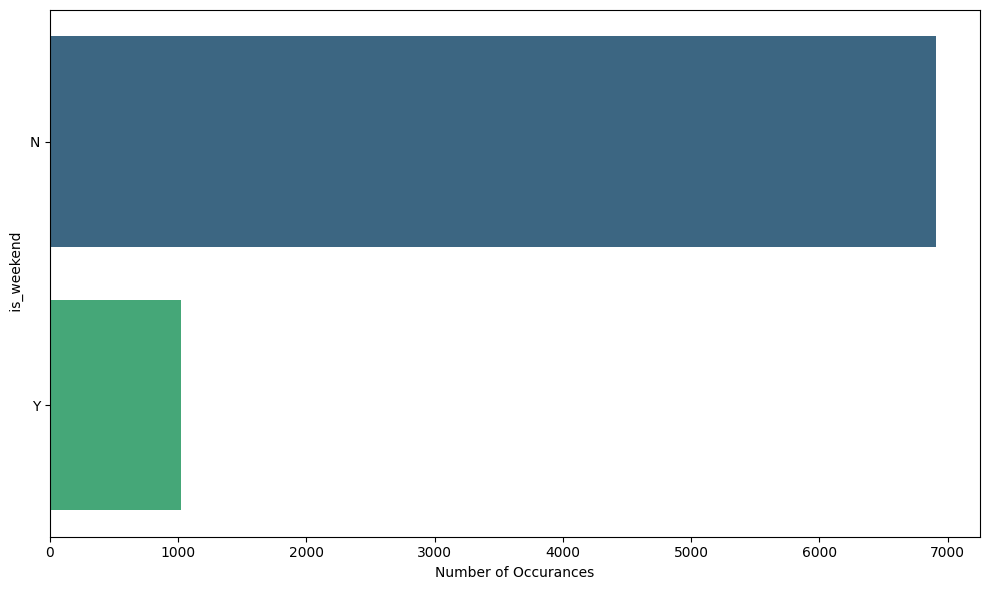

 publication_period
Weekday    6908
Weekend    1021
Name: count, dtype: int64


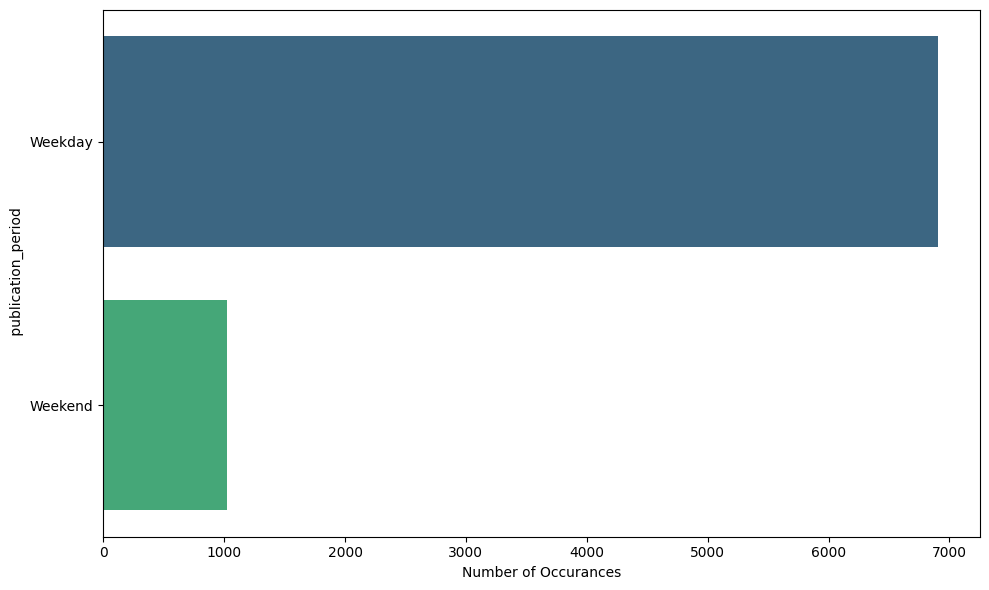

popularity_category
Slightly Popular      3799
Moderately Popular    2401
Popular               1074
Viral                  437
Unpopular              218
Name: count, dtype: int64


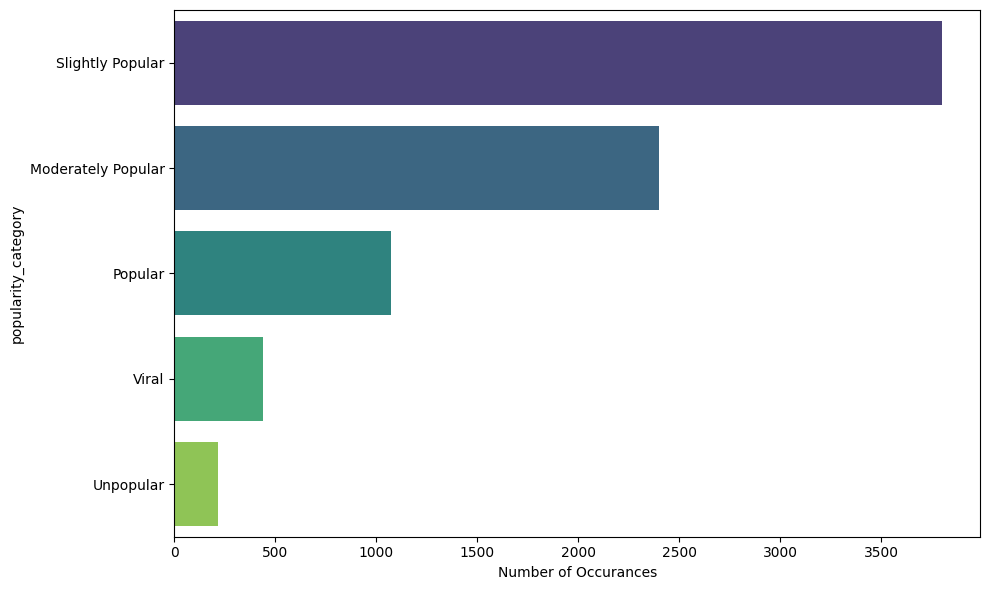

In [ ]:
for colons_num in is_col_ordinal:
    if colons_num in skip_column:
        continue

    top_countries = df_test_news[colons_num].value_counts()
    print(top_countries)

    top_countries_df = top_countries.reset_index()
    top_countries_df.columns = [colons_num, 'Count']

    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_countries_df, x='Count', y=colons_num, hue=colons_num, palette='viridis', legend=False)
    plt.xlabel("Number of Occurances")
    plt.ylabel(colons_num)
    plt.tight_layout()
    plt.show()

In [ ]:
df_numeric_news = pd.DataFrame(df_train_news, columns=is_col_numeric)
matrix_corr = df_numeric_news.corr()
elements_correlated = {}


associated_elements_with_index = {}
for idx, core_columns in enumerate(df_numeric_news.columns):
    associated_elements_with_index[core_columns] = idx


for core_columns in matrix_corr.columns:
    for row in matrix_corr.index:
        value = matrix_corr.loc[row, core_columns]
        if row not in elements_correlated.keys():
            elements_correlated[row] = []
        
        if value > 0.80 and core_columns!=row:
            elements_correlated[core_columns].append(row)
            


In [ ]:
df_train_news_filtered = df_train_news.copy()
elements_to_be_eliminated = []
for keys_elements in elements_correlated.keys():

    if elements_correlated[keys_elements] == [] or keys_elements in elements_to_be_eliminated:
        continue
    max_num_elements = np.max([len(elements_correlated[x]) for x in elements_correlated[keys_elements]])

    if max_num_elements > len(elements_correlated[keys_elements]):
        max_num_elements = len(elements_correlated[keys_elements])

    copy_elements_correlated = elements_correlated[keys_elements].copy()
    copy_elements_correlated.append(keys_elements)
    copy_elements_correlated_filter = list(filter(lambda x:len(elements_correlated[x])==max_num_elements,copy_elements_correlated))
    copy_elements_correlated_to_be_eliminated = copy_elements_correlated.copy()

    if len(copy_elements_correlated_filter) != list():
        if elements_correlated[keys_elements] == []:
            continue
        max_num_elements = np.max([num_examples_without_empty_values[associated_elements_with_index[x]] for x in elements_correlated[keys_elements]])
        if max_num_elements > num_examples_without_empty_values[associated_elements_with_index[keys_elements]]:
            max_num_elements = num_examples_without_empty_values[associated_elements_with_index[keys_elements]]

        copy_elements_correlated = elements_correlated[keys_elements].copy()
        copy_elements_correlated.append(keys_elements)
        copy_elements_correlated_filter = list(filter(lambda x:num_examples_without_empty_values[associated_elements_with_index[x]]==max_num_elements,copy_elements_correlated_filter))
    

    if len(copy_elements_correlated_filter) != list():
        copy_elements_correlated_filter = copy_elements_correlated_filter[-1:]
    
    if copy_elements_correlated_filter != list():
        copy_elements_correlated_to_be_eliminated.remove(copy_elements_correlated_filter[0])
        elements_to_be_eliminated.extend(copy_elements_correlated_to_be_eliminated)


In [ ]:
target_column_NEWS = "popularity_category"

In [ ]:
from scipy.stats import chi2_contingency
df_ordinal_news = pd.DataFrame(df_train_news, columns=is_col_ordinal)
our_pnewss = set()
elements_correlated_ordinal = {}

associated_elements_with_index = {}
for idx, core_columns in enumerate(df_ordinal_news.columns):
    associated_elements_with_index[core_columns] = idx


for columns in df_ordinal_news.columns:
    frequency_per_element = []

    
    for new_columns in df_ordinal_news.columns:
        if columns == new_columns or (new_columns, columns) in our_pnewss:
                continue
        our_elements_list = []
        for index, values in enumerate(df_ordinal_news[columns].dropna().unique()):
            our_element = []
            indices = df_ordinal_news[df_ordinal_news[columns] == values].index.to_list()
        
        

            elements = {}
            
            for idx in indices:
                if df_ordinal_news.at[idx, new_columns] not in elements.keys():
                    elements[df_ordinal_news.at[idx, new_columns]] = 1
                else:
                    elements[df_ordinal_news.at[idx, new_columns]]+=1
            
            for values_opp in df_ordinal_news[new_columns].dropna().unique():
                if values_opp in elements.keys():
                    our_element.append(elements[values_opp])
                else:
                    our_element.append(0)
            our_elements_list.append(our_element)
        chi2, p, dof, expected = chi2_contingency(our_elements_list)
        if p >= 0.95 and new_columns != target_column_NEWS and columns != target_column_NEWS:
            our_pnewss.add((columns, new_columns))
            if columns not in elements_correlated_ordinal:
                elements_correlated_ordinal[columns] = []
            if new_columns not in elements_correlated_ordinal:
                elements_correlated_ordinal[new_columns] = []
            elements_correlated_ordinal[columns].append(new_columns)
            elements_correlated_ordinal[new_columns].append(columns)
               

    

In [ ]:
for keys_elements in elements_correlated_ordinal.keys():

    if elements_correlated_ordinal[keys_elements] == [] or keys_elements in elements_to_be_eliminated:
        continue
    max_num_elements = np.max([len(elements_correlated_ordinal[x]) for x in elements_correlated_ordinal[keys_elements]])

    if max_num_elements > len(elements_correlated_ordinal[keys_elements]):
        max_num_elements = len(elements_correlated_ordinal[keys_elements])

    copy_elements_correlated = elements_correlated_ordinal[keys_elements].copy()
    copy_elements_correlated.append(keys_elements)
    copy_elements_correlated_filter = list(filter(lambda x:len(elements_correlated_ordinal[x])==max_num_elements,copy_elements_correlated))
    copy_elements_correlated_to_be_eliminated = copy_elements_correlated_filter.copy()

    if len(copy_elements_correlated_filter) != list():
        if elements_correlated_ordinal[keys_elements] == []:
            continue
        max_num_elements = np.max([num_examples_without_empty_values[associated_elements_with_index[x]] for x in elements_correlated_ordinal[keys_elements]])
        if max_num_elements > num_examples_without_empty_values[associated_elements_with_index[keys_elements]]:
            max_num_elements = num_examples_without_empty_values[associated_elements_with_index[keys_elements]]

        copy_elements_correlated = elements_correlated_ordinal[keys_elements].copy()
        copy_elements_correlated.append(keys_elements)
        copy_elements_correlated_filter = list(filter(lambda x:num_examples_without_empty_values[associated_elements_with_index[x]]==max_num_elements,copy_elements_correlated))
    

    if len(copy_elements_correlated_filter) != list():
        copy_elements_correlated_filter = copy_elements_correlated_filter[-1:]
    
    if copy_elements_correlated_filter != list():
        copy_elements_correlated_to_be_eliminated.remove(copy_elements_correlated_filter[0])
        elements_to_be_eliminated.extend(copy_elements_correlated_to_be_eliminated)

In [ ]:

outliers_list = []

for index in range(len(l_25th_percentile_val)):
    outliers = df_train_news[(df_train_news[df_numeric_news.columns[index]] < l_25th_percentile_val[index]) | (df_train_news[df_numeric_news.columns[index]] > l_75th_percentile_val[index])]
    outliers_current = outliers[df_numeric_news.columns[index]].unique()
    if l_25th_percentile_val[index] == l_75th_percentile_val[index]:
        outliers_current = outliers[df_numeric_news.columns[index]].unique()
        outliers_current = list(filter(lambda x: len(outliers[outliers[df_numeric_news.columns[index]] == x]) < 30 , outliers_current))
        outliers_current = list(map(lambda x: int(x), outliers_current))
    outliers_list.append(outliers_current)
        


In [ ]:
temp_df_all = df_train_news_filtered.copy()
temp_df_all_back = df_train_news_filtered.copy()
df_test_news_filtered = df_test_news.copy()


for idx2, colons_ord in enumerate(is_col_ordinal):
    if len(df_train_news_filtered[colons_ord].copy().dropna()) != len(df_train_news_filtered[colons_ord]):
        if elements_correlated_ordinal != dict():
            list_correlated_values = []
        else:
            list_correlated_values = []


        for idx, it in enumerate(df_train_news_filtered[colons_ord].isna()): 
            if it:
                list_correlated_values_filter = list(filter(lambda x: df_train_news_filtered.at[idx, x] == df_train_news_filtered.at[idx, x], list_correlated_values))
                if list_correlated_values_filter != []:
                    our_col = list_correlated_values_filter[0]
                    df_train_news_filtered.at[idx, colons_ord] = df_train_news_filtered.at[idx, our_col]
                else:
                   
                    df_train_news_filtered.drop(idx,axis=0,inplace=True) 
    if len(df_test_news_filtered[colons_ord].copy().dropna()) != len(df_test_news_filtered[colons_ord]):
        if elements_correlated_ordinal != dict():
            list_correlated_values = []
        else:
            list_correlated_values = []

        for idx, it in enumerate(df_test_news_filtered[colons_ord].isna()): 
            if it:
                list_correlated_values_filter = list(filter(lambda x: df_test_news_filtered.at[idx, x] == df_test_news_filtered.at[idx, x], list_correlated_values))
                if list_correlated_values_filter != []:
                    our_col = list_correlated_values_filter[0]
                    df_test_news_filtered.at[idx, colons_ord] = df_test_news_filtered.at[idx, our_col]
                else:
                   
                    df_test_news_filtered.drop(idx,axis=0,inplace=True) 



In [ ]:
df_train_news_filtered2 = df_train_news_filtered.copy()
df_test_news_filtered2 = df_test_news_filtered.copy()

for idx2, colons_ord in enumerate(is_col_discreet):
    
   if len(df_train_news_filtered[colons_ord].copy().dropna()) != len(df_train_news_filtered[colons_ord]):
       for idx, _ in df_train_news_filtered.iterrows():
          if df_train_news_filtered.at[idx, colons_ord] != df_train_news_filtered.at[idx, colons_ord]:
            df_train_news_filtered2.drop(idx,axis=0,inplace=True) 
   if len(df_test_news_filtered[colons_ord].copy().dropna()) != len(df_test_news_filtered[colons_ord]):
       for idx, _ in df_test_news_filtered.iterrows():
          if df_test_news_filtered.at[idx, colons_ord] != df_test_news_filtered.at[idx, colons_ord]:
            df_test_news_filtered2.drop(idx,axis=0,inplace=True) 
df_train_news_filtered = df_train_news_filtered2.copy()
df_test_news_filtered = df_test_news_filtered2.copy()

In [ ]:
df_train_news_filtered_caaa2 = df_train_news_filtered.copy()
df_test_news_filtered_caaa2 = df_test_news_filtered.copy()

In [ ]:
df_train_news_filtered = df_train_news_filtered_caaa2.copy()
df_test_news_filtered = df_test_news_filtered_caaa2.copy()

In [ ]:
length_elements = len(df_train_news_filtered)
for columns_el in is_col_numeric:

    median_ = df_train_news_filtered[columns_el].quantile(0.5)

    ratio_number_val_per_unique = length_elements/len(df_train_news_filtered[columns_el].unique())
    mean = np.mean(list(df_train_news_filtered[columns_el])) 
    std_dev = np.std(list(df_train_news_filtered[columns_el]))

    

    Q1 = df_train_news_filtered[columns_el].quantile(0.05)
    Q3 = df_train_news_filtered[columns_el].quantile(0.95)
    
    outliers_curr = df_train_news_filtered.copy()
    outliers_curr_Q3 = outliers_curr[(outliers_curr[columns_el]>Q3)]
    outliers_curr_Q1 = outliers_curr[(outliers_curr[columns_el]<Q1)]



    lst_rev = list(outliers_curr[columns_el].unique())
    lst_rev.sort(reverse=True)
    lst_rev = list(map(lambda x: float(x), lst_rev))

    lst_rev_Q3 = list(outliers_curr_Q3[columns_el].unique())
    lst_rev_Q3.sort(reverse=True)
    lst_rev_A3 = list(map(lambda x: float(x), lst_rev))

    lst_rev_Q1 = list(outliers_curr_Q1[columns_el].unique())
    lst_rev_Q1.sort(reverse=True)
    lst_rev_Q1 = list(map(lambda x: float(x), lst_rev_Q1))

    outliers = []
    outliers.extend(lst_rev_Q1)
    outliers.extend(lst_rev_Q3)


    if outliers != []:
        out_z = []
        for out in outliers:
            df_train_news_filtered[columns_el] = df_train_news_filtered[columns_el].replace(out, np.nan)

In [ ]:
length_elements = len(df_test_news_filtered)
for columns_el in is_col_numeric:

    median_ = df_test_news_filtered[columns_el].quantile(0.5)

    ratio_number_val_per_unique = length_elements/len(df_test_news_filtered[columns_el].unique())
    mean = np.mean(list(df_test_news_filtered[columns_el])) 
    std_dev = np.std(list(df_test_news_filtered[columns_el]))

    
    current_outliers = df_test_news_filtered.copy()
    Q1 = df_test_news_filtered[columns_el].quantile(0.05)
    Q3 = df_test_news_filtered[columns_el].quantile(0.95)
    
    outliers_curr = df_test_news_filtered.copy()
    outliers_curr_Q3 = outliers_curr[(outliers_curr[columns_el]>Q3)]
    outliers_curr_Q1 = outliers_curr[(outliers_curr[columns_el]<Q1)]



    lst_rev = list(outliers_curr[columns_el].unique())
    lst_rev.sort(reverse=True)
    lst_rev = list(map(lambda x: float(x), lst_rev))

    lst_rev_Q3 = list(outliers_curr_Q3[columns_el].unique())
    lst_rev_Q3.sort(reverse=True)
    lst_rev_A3 = list(map(lambda x: float(x), lst_rev))

    lst_rev_Q1 = list(outliers_curr_Q1[columns_el].unique())
    lst_rev_Q1.sort(reverse=True) 
    lst_rev_Q1 = list(map(lambda x: float(x), lst_rev_Q1))
    outliers = []
    outliers.extend(lst_rev_Q1)
    outliers.extend(lst_rev_Q3)

    if outliers != []:
        out_z = []
        for out in outliers:
            df_test_news_filtered[columns_el] = df_test_news_filtered[columns_el].replace(out, np.nan)

In [ ]:
df_train_news_filtered_caaa = df_train_news_filtered.copy()
df_test_news_filtered_caaa = df_test_news_filtered.copy()

In [ ]:
df_train_news_filtered = df_train_news_filtered_caaa.copy()
df_test_news_filtered = df_test_news_filtered_caaa.copy()

In [ ]:
'''imputer = IterativeImputer(max_iter=50, initial_strategy='mean', random_state=0)
df_train_news_filtered[is_col_numeric] = imputer.fit_transform(df_train_news_filtered[is_col_numeric])'''

"imputer = IterativeImputer(max_iter=50, initial_strategy='mean', random_state=0)\ndf_train_news_filtered[is_col_numeric] = imputer.fit_transform(df_train_news_filtered[is_col_numeric])"

In [ ]:
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy='mean')
df_train_news_filtered[is_col_numeric] = num_imp.fit_transform(df_train_news_filtered[is_col_numeric])
df_test_news_filtered[is_col_numeric]  = num_imp.transform(df_test_news_filtered[is_col_numeric])

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

is_col_ordinal_filter = list(filter(lambda x: x in df_train_news_filtered.columns, is_col_ordinal))

categorical_columns = is_col_ordinal_filter
encoder = LabelEncoder()
df_train_news_filtered_converted_label = df_train_news_filtered.copy()
for idx, columns_ordinal in enumerate(is_col_ordinal):
   
    list_values = encoder.fit_transform(df_train_news_filtered[columns_ordinal].astype(str))
    df_train_news_filtered[columns_ordinal] = list_values
    df_train_news_filtered_converted_label[columns_ordinal] = list_values
    

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

is_col_ordinal_filter = list(filter(lambda x: x in df_test_news_filtered.columns, is_col_ordinal))

categorical_columns = is_col_ordinal_filter
encoder = LabelEncoder()
df_test_news_filtered_converted_label = df_test_news_filtered.copy()
for idx, columns_ordinal in enumerate(is_col_ordinal):

    list_values = encoder.fit_transform(df_test_news_filtered[columns_ordinal].astype(str))
    df_test_news_filtered[columns_ordinal] = list_values 
    df_test_news_filtered_converted_label[columns_ordinal] = list_values

    

In [ ]:
df_train_news_filtered = df_train_news_filtered.drop(list(set(elements_to_be_eliminated)), axis=1)
df_test_news_filtered = df_test_news_filtered.drop(list(set(elements_to_be_eliminated)), axis=1)

df_train_news_filtered_converted_label = df_train_news_filtered_converted_label.drop(list(set(elements_to_be_eliminated)), axis=1)
df_test_news_filtered_converted_label = df_test_news_filtered_converted_label.drop(list(set(elements_to_be_eliminated)), axis=1)

In [ ]:
from sklearn.metrics import roc_auc_score
pair_numeric_ordinal2 = {}

value_cat = {}
for columns_num in is_col_numeric:


    if columns_num not in df_train_news_filtered.columns:
        continue
    col_numeric_max = ""
    numeric_val = -1
    for columns_1 in is_col_ordinal:
        if columns_1 not in df_train_news_filtered.columns:
            continue
        df_train_news_filtered2 = df_train_news_filtered.copy().dropna(how='any', axis=0, subset=[columns_num, columns_1])
        if len(df_train_news_filtered2[columns_1].unique()) == 1:
            continue
        
        for value in df_train_news_filtered2[columns_1].unique():
            df_train_news_filtered2["is_moderate"] = (df_train_news_filtered2[columns_1] == value).astype(int)
            df_train_news_filtered23 = df_train_news_filtered2[df_train_news_filtered2[columns_1] == value]

            
            roc = roc_auc_score(df_train_news_filtered2["is_moderate"], df_train_news_filtered2[columns_num])
            if roc != roc:
                continue
            if roc >= 0.95 and roc > numeric_val :
                numeric_val = roc
                col_numeric_max = columns_1
                
        
    if col_numeric_max != "" and col_numeric_max!="":
        pair_numeric_ordinal2[columns_num] = col_numeric_max
        if col_numeric_max not in pair_numeric_ordinal2.keys() or numeric_val > value_cat[col_numeric_max]:
            value_cat[col_numeric_max] = numeric_val
            pair_numeric_ordinal2[col_numeric_max] = columns_num

pair_numeric_ordinal2_test = {}

value_cat_test = {}
for columns_num in is_col_numeric:


    if columns_num not in df_test_news_filtered.columns:
        continue
    col_numeric_max = ""
    numeric_val = -1
    for columns_1 in is_col_ordinal:
        if columns_1 not in df_test_news_filtered.columns:
            continue
        df_train_news_filtered2 = df_test_news_filtered.copy().dropna(how='any', axis=0, subset=[columns_num, columns_1])
        if len(df_train_news_filtered2[columns_1].unique()) == 1:
            continue
        
        for value in df_train_news_filtered2[columns_1].unique():
            df_train_news_filtered2["is_moderate"] = (df_train_news_filtered2[columns_1] == value).astype(int)
            df_train_news_filtered23 = df_train_news_filtered2[df_train_news_filtered2[columns_1] == value]

            
            roc = roc_auc_score(df_train_news_filtered2["is_moderate"], df_train_news_filtered2[columns_num])
            if roc != roc:
                continue
            if roc >= 0.95 and roc > numeric_val :
                numeric_val = roc
                col_numeric_max = columns_1
                
        
    if col_numeric_max != "" and col_numeric_max!="":
        pair_numeric_ordinal2_test[columns_num] = col_numeric_max
        if col_numeric_max not in pair_numeric_ordinal2_test.keys() or numeric_val > value_cat[col_numeric_max]:
            value_cat_test[col_numeric_max] = numeric_val
            pair_numeric_ordinal2_test[col_numeric_max] = columns_num
            



In [ ]:
target_column_train_news = {'popularity_category': df_train_news_filtered['popularity_category']}
df_target_train_news = pd.DataFrame(data=target_column_train_news)

target_column_test_news = {'popularity_category': df_test_news_filtered['popularity_category']}
df_target_test_news = pd.DataFrame(data=target_column_test_news)
df_original_target_train_news = df_target_train_news.copy()
df_original_target_test_news = df_target_test_news.copy()


target_column_train_news = {'popularity_category': df_train_news_filtered_converted_label['popularity_category']}
df_target_train_news = pd.DataFrame(data=target_column_train_news)

target_column_test_news = {'popularity_category': df_test_news_filtered_converted_label['popularity_category']}
df_target_test_news = pd.DataFrame(data=target_column_test_news)

df_test_news_filtered = df_test_news_filtered.drop(['popularity_category'], axis=1)
df_train_news_filtered = df_train_news_filtered.drop(['popularity_category'], axis=1)

df_test_news_filtered = df_test_news_filtered_converted_label.drop(['popularity_category'], axis=1)
df_train_news_filtered = df_train_news_filtered_converted_label.drop(['popularity_category'], axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
is_col_numeric_filter = list(filter(lambda x: x in df_train_news_filtered.columns, is_col_numeric))
df_train_news_filtered_2 = df_train_news_filtered.copy()
df_train_news_filtered_2[is_col_numeric_filter] = (scaler.fit_transform(df_train_news_filtered[is_col_numeric_filter]))
df_train_news_filtered = df_train_news_filtered_2.copy()


scaler = StandardScaler()
is_col_numeric_filter_test = list(filter(lambda x: x in df_test_news_filtered.columns, is_col_numeric))
df_test_news_filtered_2 = df_test_news_filtered.copy()
df_test_news_filtered_2[is_col_numeric_filter_test] = (scaler.fit_transform(df_test_news_filtered[is_col_numeric_filter_test]))
df_test_news_filtered = df_test_news_filtered_2.copy()


In [ ]:

df_test_news_filtered_converted_label = df_test_news_filtered_converted_label.drop(is_col_discreet, axis=1)
df_train_news_filtered_converted_label = df_train_news_filtered_converted_label.drop(is_col_discreet, axis=1)


In [ ]:

df_test_news_filtered = df_test_news_filtered.drop(is_col_discreet, axis=1)
df_train_news_filtered = df_train_news_filtered.drop(is_col_discreet, axis=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = DecisionTreeClassifier(
    max_depth=50,                
    min_samples_leaf=5,         
    criterion='entropy',  
    class_weight='balanced',  
    random_state=42
)

X_train = df_train_news_filtered
y_train = df_target_train_news['popularity_category']
clf.fit(X_train, y_train)

X_test = df_test_news_filtered
y_test = df_target_test_news['popularity_category']
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acuratețea modelului: {accuracy:.4f}")

print("\nRaport clasificare:")
print(classification_report(y_test, y_pred))

print("\nMatrice de confuzie:")
print(confusion_matrix(y_test, y_pred))

Acuratețea modelului: 0.8868

Raport clasificare:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      2139
           1       0.82      0.84      0.83       973
           2       0.95      0.91      0.93      3425
           3       0.70      0.68      0.69       200
           4       0.69      0.75      0.72       403

    accuracy                           0.89      7140
   macro avg       0.81      0.82      0.81      7140
weighted avg       0.89      0.89      0.89      7140


Matrice de confuzie:
[[1951   61  116    1   10]
 [  44  822    2    2  103]
 [ 215   28 3120   44   18]
 [   0   11   50  136    3]
 [   3   86    1   10  303]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=300, n_estimators=5, max_samples= 0.5, max_features=0.9)

X_train = df_train_news_filtered
y_train = df_target_train_news['popularity_category']
clf.fit(X_train, y_train)

X_test = df_test_news_filtered
y_test = df_target_test_news['popularity_category']
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acuratețea modelului: {accuracy:.4f}")

print("\nRaport clasificare:")
print(classification_report(y_test, y_pred))

print("\nMatrice de confuzie:")
print(confusion_matrix(y_test, y_pred))


Acuratețea modelului: 0.8797

Raport clasificare:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2139
           1       0.77      0.79      0.78       973
           2       0.91      0.91      0.91      3425
           3       0.97      0.54      0.69       200
           4       0.77      0.64      0.70       403

    accuracy                           0.88      7140
   macro avg       0.86      0.76      0.80      7140
weighted avg       0.88      0.88      0.88      7140


Matrice de confuzie:
[[2035   37   65    0    2]
 [  62  771   99    1   40]
 [ 178  102 3111    1   33]
 [   5   22   63  107    3]
 [  12   65   68    1  257]]


In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
      
    activation='relu',                
    solver='adam',                      
    learning_rate_init=0.002,         
    max_iter=500,                      
    batch_size=64,                      
    alpha=0.0001,                      
    validation_fraction=0.5,            
    random_state=42
)
X_train = df_train_news_filtered
y_train = df_target_train_news['popularity_category']
clf.fit(X_train, y_train)

X_test = df_test_news_filtered
y_test = df_target_test_news['popularity_category']
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acuratețea modelului: {accuracy:.4f}")

print("\nRaport clasificare:")
print(classification_report(y_test, y_pred))

print("\nMatrice de confuzie:")
print(confusion_matrix(y_test, y_pred))


Acuratețea modelului: 0.7794

Raport clasificare:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2139
           1       0.73      0.67      0.70       973
           2       0.86      0.82      0.84      3425
           3       0.46      0.35      0.40       200
           4       0.40      0.50      0.44       403

    accuracy                           0.78      7140
   macro avg       0.65      0.64      0.64      7140
weighted avg       0.78      0.78      0.78      7140


Matrice de confuzie:
[[1842   85  150    6   56]
 [  98  649  102   12  112]
 [ 339   97 2801   61  127]
 [  10    6  105   71    8]
 [  52   53   92    4  202]]


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['popularity_category']

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df_original_target_train_news[categorical_columns])

one_hot_df_train = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(categorical_columns), dtype=int)




In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['popularity_category']

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded_test = encoder.fit_transform(df_original_target_test_news[categorical_columns])

one_hot_df_test = pd.DataFrame(one_hot_encoded_test, 
                          columns=encoder.get_feature_names_out(categorical_columns), dtype=int)





In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, classification_report


def accuracy(Y, T):
    Y_labels = np.argmax(Y, axis=1)
    T_labels = np.argmax(T, axis=1)
    return np.mean(Y_labels == T_labels)


def softmax(z):
    element_z = z - np.max(z, axis=1, keepdims=True)
    element_z = list(map(lambda x: list(map(lambda y: float(y), x)), element_z))
    e_z = np.exp(element_z) 
    return e_z / np.sum(e_z, axis=1, keepdims=True)

def predict_logistic2(X, W, b):
    return softmax(np.dot(X, W) + b)  # (N, C)

def cross_entropy(Y, T):
    Y = Y / np.sum(Y, axis=1, keepdims=True)
    eps = 1e-15
    return -np.mean(np.sum(np.where(T != 0, np.where(T!=1, T * np.log(Y), 1-eps), eps), axis=1))

def train_and_eval_logistic(X_train, T_train, X_test, T_test, lr=0.01, epochs_no=200):
    N, D = X_train.shape
    C = T_train.shape[1]

    W = np.random.randn(D, C) * lr

    train_acc, test_acc = [], []
    train_nll, test_nll = [], []
    b = np.zeros((1, C))

    for epoch in range(epochs_no):
        Y_train = predict_logistic2(X_train, W, b)
        Y_test = predict_logistic2(X_test, W, b)

        acc_train = accuracy(Y_train, T_train)
        acc_test = accuracy(Y_test, T_test)
        

        train_acc.append(acc_train)
        test_acc.append(acc_test)

        nll_train = cross_entropy(Y_train, T_train)
        nll_test = cross_entropy(Y_test, T_test)
        train_nll.append(nll_train)
        test_nll.append(nll_test)

        grad_W = np.dot(X_train.T, (Y_train - T_train)) / N
        grad_B = np.mean(Y_train - T_train, axis=0, keepdims=True)
        b-=grad_B*lr
        

        grad_W = list(map(lambda x: (list(map(lambda y: lr * float(y), x))), grad_W))
        W -= grad_W
    
    
    y_test = np.argmax(Y_test, axis=1)
    y_pred = np.argmax(T_test, axis=1)
    
    cm = confusion_matrix(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_per_class = f1_score(y_test, y_pred, average=None)
    report = classification_report(y_test, y_pred, zero_division=0)

    return W, train_nll, test_nll, train_acc, test_acc, cm, f1_macro, f1_per_class, report

In [ ]:
y_train = one_hot_df_train.values
y_pred = one_hot_df_test.values

X_train = df_train_news_filtered
X_test = df_test_news_filtered
w, train_nll, test_nll, train_acc, test_acc, cm, f1_macro, f1_per_class, report = train_and_eval_logistic(X_train, y_train, X_test, y_pred, 0.1, epochs_no=140)

In [ ]:

print("\nRaport clasificare:")
print(report)

print("\nMatrice de confuzie:")
print(cm)



Raport clasificare:
              precision    recall  f1-score   support

           0       0.40      0.52      0.45      1632
           1       0.29      0.56      0.38       506
           2       0.91      0.62      0.74      4993
           3       0.00      0.00      0.00         0
           4       0.00      0.22      0.01         9

    accuracy                           0.59      7140
   macro avg       0.32      0.38      0.32      7140
weighted avg       0.75      0.59      0.65      7140


Matrice de confuzie:
[[ 849  383  287   17   96]
 [  85  282   20    1  118]
 [1204  306 3114  182  187]
 [   0    0    0    0    0]
 [   1    2    4    0    2]]


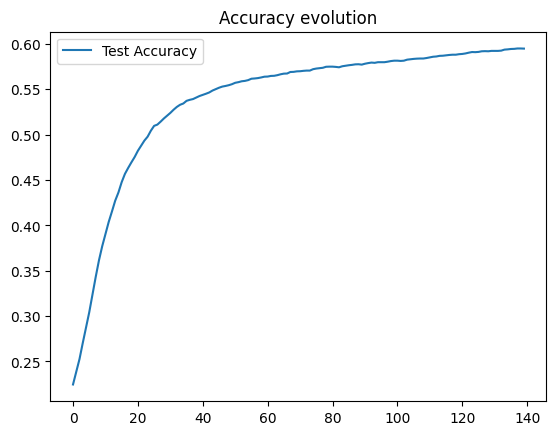

In [ ]:
plt.plot(test_acc, label="Test Accuracy")
plt.legend()
plt.title("Accuracy evolution")
plt.show()

In [ ]:
print(f"Acuratete finala pe setul train: {train_acc[-1]}")


Acuratete finala pe setul train: 0.605501051156272
